# Part 0: Setup

## Environment setup


In [1]:
!pip3 install torch
!pip3 install pytorch_lightning
!pip3 install torchvision
!pip3 install dandi
!pip3 install git+https://github.com/neurallatents/nlb_tools.git
!pip3 install cmasher

  Using cached dandi-0.40.1-py3-none-any.whl (322 kB)
  Using cached click_didyoumean-0.3.0-py3-none-any.whl (2.7 kB)
  Using cached etelemetry-0.3.0-py3-none-any.whl (6.3 kB)
  Using cached pynwb-2.0.1-py2.py3-none-any.whl (115 kB)
  Using cached pycryptodomex-3.14.1-cp35-abi3-win_amd64.whl (1.8 MB)
  Using cached zarr-2.11.3-py3-none-any.whl (153 kB)
  Using cached fasteners-0.17.3-py3-none-any.whl (18 kB)
  Using cached ruamel.yaml-0.17.21-py3-none-any.whl (109 kB)
  Using cached keyring-23.6.0-py3-none-any.whl (34 kB)
  Using cached nwbinspector-0.4.5-py3-none-any.whl (31 kB)
  Using cached fscacher-0.2.0-py3-none-any.whl (11 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached keyrings.alt-4.1.0-py3-none-any.whl (20 kB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
  Using cached dandischema-0.7.1-py3-none-any.whl (63 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached hu

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Chris\miniconda3\envs\chenEnv\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Chris\\AppData\\Local\\Temp\\pip-install-us_tj37p\\numcodecs_7e7e6912af694559ac8ac6b20913776a\\setup.py'"'"'; __file__='"'"'C:\\Users\\Chris\\AppData\\Local\\Temp\\pip-install-us_tj37p\\numcodecs_7e7e6912af694559ac8ac6b20913776a\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Chris\AppData\Local\Temp\pip-wheel-x0oarh7q'
       cwd: C:\Users\Chris\AppData\Local\Temp\pip-install-us_tj37p\numcodecs_7e7e6912af694559ac8ac6b20913776a\
  Complete output (131 lines):
  [numcodecs] setting up Blosc extension
  [numcodecs] compiling Blosc extension with SSE2 su

  Cloning https://github.com/neurallatents/nlb_tools.git to c:\users\chris\appdata\local\temp\pip-req-build-jac4howy
  Resolved https://github.com/neurallatents/nlb_tools.git to commit ff32239dc19466db9f61462e3d53906df0d0efd6
  Using cached pandas-1.3.4-cp310-cp310-win_amd64.whl (10.2 MB)
  Using cached scikit_learn-1.1.1-cp310-cp310-win_amd64.whl (7.3 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Created wheel for nlb-tools: filename=nlb_tools-0.0.1-py3-none-any.whl size=33173 sha256=4500317c82701a3246f45eadcf531b4eeb2e7d0fc659cfa181811b02a8345460
  Stored in directory: C:\Users\Chris\AppData\Local\Temp\pip-ephem-wheel-cache-ao6v5pzt\wheels\db\f1\81\e0fabfc232e056102d5fca550b8e96a117cb3a0f0dde1a1085
Successfully built nlb-tools
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2


  Running command git clone -q https://github.com/neurallatents/nlb_tools.git 'C:\Users\Chris\AppData\Local\Temp\pip-req-build-jac4howy'


  Using cached cmasher-1.6.3-py3-none-any.whl (367 kB)
  Using cached matplotlib-3.5.2-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached e13tools-0.9.6-py3-none-any.whl (40 kB)
  Using cached colorspacious-1.1.2-py2.py3-none-any.whl (37 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.3-cp310-cp310-win_amd64.whl (55 kB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)


## Data download

In [2]:
!dandi download DANDI:000140/0.220113.0408

'dandi' is not recognized as an internal or external command,
operable program or batch file.


## Imports

In [1]:

# Imports
import os
import torch
from torchvision import datasets
from torchvision import transforms

from nlb_tools.nwb_interface import NWBDataset
import h5py
import numpy as np
import logging
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import cmasher as cmr
logger = logging.getLogger(__name__)
from sklearn.decomposition import PCA
from torch.autograd import Variable

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d   

import random
random.seed(2022)

curr_path = os.getcwd()
fpath = curr_path + '/000140/sub-Jenkins/'
os.listdir(fpath) 

c:\Users\Chris\miniconda3\envs\chenEnv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['sub-Jenkins_ses-small_desc-test_ecephys.nwb',
 'sub-Jenkins_ses-small_desc-train_behavior+ecephys.nwb']

In [2]:
''' Tensor saving functions '''

def _check_h5_r(data_dict, h5obj, overwrite):
    """Recursive helper function that finds duplicate keys and deletes them if `overwrite == True`
    
    Parameters
    ----------
    data_dict : dict
        Dict containing data to be saved in HDF5 format
    h5obj : h5py.File or h5py.Group
        h5py object to check for duplicates
    overwrite : bool, optional
        Whether to overwrite duplicate data found 
        at `save_path` if file already exists, by
        default False
    
    Returns
    -------
    tuple
        Tuple containing bool of whether `h5obj` passes
        checks and list of duplicate keys found
    """
    dup_list = []
    good = True
    for key in data_dict.keys():
        if key in h5obj.keys():
            if isinstance(h5obj[key], h5py.Group) and isinstance(data_dict[key], dict):
                rgood, rdup_list = _check_h5_r(data_dict[key], h5obj[key], overwrite)
                good = good and rgood
                dup_list += list(zip([key] * len(rdup_list), rdup_list))
            else:
                dup_list.append(key)
                if overwrite:
                    del h5obj[key]
                else:
                    good = False
    return good, dup_list

def save_to_h5(data_dict, save_path, overwrite=False, dlen=32):
    """Function that saves dict as .h5 file while preserving
    nested dict structure

    Parameters
    ----------
    data_dict : dict
        Dict containing data to be saved in HDF5 format
    save_path : str
        Path to location where data should be saved
    overwrite : bool, optional
        Whether to overwrite duplicate data found 
        at `save_path` if file already exists, by
        default False
    dlen : int, optional
        Byte length of data format to save numerical data,
        by default 32.
    """
    h5file = h5py.File(save_path, 'a')
    good, dup_list = _check_h5_r(data_dict, h5file, overwrite)
    if good:
        if len(dup_list) > 0:
            logger.warning(f"{dup_list} already found in {save_path}. Overwriting...")
        _save_h5_r(data_dict, h5file, dlen)
        logger.info(f"Saved data to {save_path}")
    else:
        logger.warning(f"{dup_list} already found in {save_path}. Save to file canceled. " \
            "Please set `overwrite=True` or specify a different file path.")
    h5file.close()

    
def _save_h5_r(data_dict, h5obj, dlen):
    """Recursive function that adds all the items in a dict to an h5py.File or h5py.Group object

    Parameters
    ----------
    data_dict : dict
        Dict containing data to be saved in HDF5 format
    h5obj : h5py.File or h5py.Group
        h5py object to save data to
    dlen : int, optional
        Byte length of data format to save numerical data,
        by default 32.
    """
    for key, val in data_dict.items():
        if isinstance(val, dict):
            h5group = h5obj[key] if key in h5obj.keys() else h5obj.create_group(key)
            _save_h5_r(val, h5group, dlen)
        else:
            if val.dtype == 'object':
                sub_dtype = f'float{dlen}' if val[0].dtype == np.float else f'int{dlen}' if val[0].dtype == np.int else val[0].dtype
                dtype = h5py.vlen_dtype(sub_dtype)
            else:
                dtype = f'float{dlen}' if val.dtype == np.float else f'int{dlen}' if val.dtype == np.int else val.dtype
            h5obj.create_dataset(key, data=val, dtype=dtype)
            
def to_tensor(array):
    """Converts a loaded numpy array to a tensor
    and ensures correct dtype

    Parameters
    ----------
    array : np.array
        The numpy array to convert.

    Returns
    -------
    torch.Tensor
        The converted tensor.
    """
    return torch.tensor(array, dtype=torch.float)
            

# Part 1: Neural Dynamics and Maze Data

## Overview of Maze Dataset

In [3]:
dataset = NWBDataset(fpath=fpath) 

print(f'Data shape: {dataset.data.shape}')
print(f'Bin width: {dataset.bin_width} ms')
dataset.resample(100)
print(f'Resampled data shape: {dataset.data.shape}')
print(f'Resampled bin width: {dataset.bin_width} ms')

c:\Users\Chris\miniconda3\envs\chenEnv\lib\site-packages\hdmf\utils.py:577: FutureWarning: DynamicTable.__init__: Using positional arguments for this method is discouraged and will be deprecated in a future major release. Please use keyword arguments to ensure future compatibility.
  warnings.warn(msg, FutureWarning)


Data shape: (373666, 150)
Bin width: 1 ms
Resampled data shape: (3737, 150)
Resampled bin width: 100 ms


## Inspect Maze dataset


In [4]:

dataset.data

signal_type             cursor_pos                eye_pos              \
channel                          x          y           x           y   
clock_time                                                              
0 days 00:00:00                NaN        NaN         NaN         NaN   
0 days 00:00:00.100000         NaN        NaN         NaN         NaN   
0 days 00:00:00.200000         NaN        NaN         NaN         NaN   
0 days 00:00:00.300000         NaN        NaN         NaN         NaN   
0 days 00:00:00.400000         NaN        NaN         NaN         NaN   
...                            ...        ...         ...         ...   
0 days 00:06:13.200000 -116.830138 -79.026112  -86.691485  -84.267839   
0 days 00:06:13.300000 -116.750049 -79.240785 -122.406536 -118.812424   
0 days 00:06:13.400000 -116.724796 -79.349803 -131.168424 -127.937248   
0 days 00:06:13.500000 -117.005937 -79.675037 -129.926425 -125.788834   
0 days 00:06:13.600000 -116.155788 -78.966177 -129.233038 -124.267660   

signal_type               hand_pos              hand_vel            \
channel                          x           y         x         y   
clock_time                                                           
0 days 00:00:00                NaN         NaN       NaN       NaN   
0 days 00:00:00.100000         NaN         NaN       NaN       NaN   
0 days 00:00:00.200000         NaN         NaN       NaN       NaN   
0 days 00:00:00.300000         NaN         NaN       NaN       NaN   
0 days 00:00:00.400000         NaN         NaN       NaN       NaN   
...                            ...         ...       ...       ...   
0 days 00:06:13.200000 -116.827882 -114.052252  1.949748 -2.576864   
0 days 00:06:13.300000 -116.787412 -114.255468 -0.821926 -1.249173   
0 days 00:06:13.400000 -116.748921 -114.370507  1.088111 -1.063585   
0 days 00:06:13.500000 -117.033121 -114.812497  1.888181  0.758564   
0 days 00:06:13.600000 -116.184327 -113.867058  0.111294  3.708668   

signal_type            heldout_spikes       ... spikes                      \
channel                          1012 1021  ...   2771 2772 2791 2792 2801   
clock_time                                  ...                              
0 days 00:00:00                   NaN  NaN  ...    0.0  0.0  0.0  0.0  0.0   
0 days 00:00:00.100000            NaN  NaN  ...    0.0  1.0  0.0  0.0  0.0   
0 days 00:00:00.200000            NaN  NaN  ...    0.0  0.0  0.0  0.0  0.0   
0 days 00:00:00.300000            NaN  NaN  ...    0.0  0.0  0.0  0.0  0.0   
0 days 00:00:00.400000            NaN  NaN  ...    0.0  0.0  0.0  0.0  0.0   
...                               ...  ...  ...    ...  ...  ...  ...  ...   
0 days 00:06:13.200000            0.0  0.0  ...    0.0  0.0  0.0  0.0  0.0   
0 days 00:06:13.300000            0.0  0.0  ...    0.0  0.0  0.0  0.0  0.0   
0 days 00:06:13.400000            0.0  0.0  ...    0.0  0.0  1.0  0.0  0.0   
0 days 00:06:13.500000            0.0  0.0  ...    0.0  0.0  0.0  1.0  0.0   
0 days 00:06:13.600000            0.0  0.0  ...    1.0  0.0  0.0  1.0  0.0   

signal_type                                      
channel                2802 2812 2821 2842 2861  
clock_time                                       
0 days 00:00:00         2.0  0.0  2.0  0.0  0.0  
0 days 00:00:00.100000  1.0  1.0  1.0  0.0  0.0  
0 days 00:00:00.200000  2.0  0.0  1.0  0.0  0.0  
0 days 00:00:00.300000  1.0  0.0  0.0  1.0  0.0  
0 days 00:00:00.400000  1.0  0.0  0.0  1.0  0.0  
...                     ...  ...  ...  ...  ...  
0 days 00:06:13.200000  0.0  0.0  1.0  0.0  0.0  
0 days 00:06:13.300000  0.0  0.0  2.0  0.0  0.0  
0 days 00:06:13.400000  0.0  0.0  1.0  0.0  0.0  
0 days 00:06:13.500000  0.0  0.0  1.0  0.0  0.0  
0 days 00:06:13.600000  1.0  0.0  0.0  0.0  0.0  

[3737 rows x 150 columns]

In [8]:
# Visualize data

## Trim and package data for training

In [5]:

# Create train and valid dataloaders
params_in = {
    'mc_maze_small': {
        'spk_field': 'spikes',
        'hospk_field': 'heldout_spikes',
        'rate_field': 'rates',
        'horate_field': 'heldout_rates',
        'make_params': {
            'align_field': 'move_onset_time',
            'align_range': (-250, 450),
        },
        'eval_make_params': {
            'align_field': 'move_onset_time',
            'align_range': (-250, 450),
        },
        'fp_len': 200,
    },
}

def make_train_array(dataset = dataset, 
                      dataset_name = "mc_maze_small", 
                      trial_split = "train",
                      params_in = params_in, 
                      save_path_array = "train_input_array.h5",
                      ):

  params = params_in[dataset_name].copy()
  spk_field = params['spk_field']
  hospk_field = params['hospk_field']
  make_params = params['make_params'].copy()
  split_to_mask = lambda x: (dataset.trial_info.split == x) if isinstance(x, str) else x
  trial_mask = split_to_mask(trial_split)

  def make_stacked_array(dataset, spk_field, hospk_field, make_params, trial_mask):
    # TODO: Complete this dataloader:
    # Should stack a tensor and generate a data dict with fields: 
    #   - train_spikes_heldin:  BxTxNin Tensor (B = # of Trials, T = # of bins per trial, Nin = # of Neurons (heldin))
    #   - train_spikes_heldout: BxTxNout (B = # of Trials, T = # of bins per trial, Nout = # of neurons (heldout))
    trial_data = dataset.make_trial_data(ignored_trials=~trial_mask, **make_params)
    array_dict = {}

    # ---------------------For the students -----------------------------------
    array_dict["train_spikes_heldin"] = trial_data[spk_field].to_numpy()
    array_dict["train_spikes_heldout"] = trial_data[hospk_field].to_numpy()
    # --------------------------------------------------------------------------
    print("Shape of heldin array {}.".format(array_dict["train_spikes_heldin"].shape))
    print("Shape of heldout array {}.".format(array_dict["train_spikes_heldout"].shape))
    return array_dict

  data_dict_array = make_stacked_array(dataset,
                                      spk_field = spk_field,
                                      hospk_field = hospk_field,
                                      make_params = make_params,
                                      trial_mask = trial_mask)

  save_to_h5(data_dict_array, save_path_array, overwrite = True)

save_path_array = "train_input_array.h5"
make_train_array(dataset, save_path_array = save_path_array)




['train_spikes_heldin', 'train_spikes_heldout'] already found in train_input_array.h5. Overwriting...


Shape of heldin array (525, 107).
Shape of heldout array (525, 35).


C:\Users\Chris\AppData\Local\Temp\ipykernel_17356\3439920927.py:92: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = f'float{dlen}' if val.dtype == np.float else f'int{dlen}' if val.dtype == np.int else val.dtype
C:\Users\Chris\AppData\Local\Temp\ipykernel_17356\3439920927.py:92: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in 

In [6]:
def make_train_tensor(dataset = dataset, 
                      dataset_name = "mc_maze_small", 
                      trial_split = "train",
                      params_in = params_in, 
                      save_path_tensor = "train_input_tensor.h5",
                      ):

  params = params_in[dataset_name].copy()
  spk_field = params['spk_field']
  hospk_field = params['hospk_field']
  make_params = params['make_params'].copy()
  split_to_mask = lambda x: (dataset.trial_info.split == x) if isinstance(x, str) else x
  trial_mask = split_to_mask(trial_split)

  def make_stacked_tensor(dataset, spk_field, hospk_field, make_params, trial_mask):
    # TODO: Complete this dataloader:
    # Should stack a tensor and generate a data dict with fields: 
    #   - train_spikes_heldin:  BxTxNin Tensor (B = # of Trials, T = # of bins per trial, Nin = # of Neurons (heldin))
    #   - train_spikes_heldout: BxTxNout (B = # of Trials, T = # of bins per trial, Nout = # of neurons (heldout))
    trial_data = dataset.make_trial_data(ignored_trials=~trial_mask, **make_params)
    grouped = list(trial_data.groupby('trial_id', sort=False))
    array_dict = {}

    # ---------------------For the students -----------------------------------
    array_dict["train_spikes_heldin"] = np.stack([trial[spk_field].to_numpy() for _, trial in grouped])
    array_dict["train_spikes_heldout"] = np.stack([trial[hospk_field].to_numpy() for _, trial in grouped])
    # --------------------------------------------------------------------------
    print("Shape of heldin tensor {}.".format(array_dict["train_spikes_heldin"].shape))
    print("Shape of heldout tensor {}.".format(array_dict["train_spikes_heldout"].shape))
    return array_dict

  data_dict_tensor = make_stacked_tensor(dataset, 
                                 spk_field = spk_field, 
                                 hospk_field = hospk_field, 
                                 make_params= make_params, 
                                 trial_mask= trial_mask)
  
  save_to_h5(data_dict_tensor,save_path_tensor, overwrite = True)

save_path_tensor = "train_input_tensor.h5"
make_train_tensor(dataset, save_path_tensor = save_path_tensor)

['train_spikes_heldin', 'train_spikes_heldout'] already found in train_input_tensor.h5. Overwriting...


Shape of heldin tensor (75, 7, 107).
Shape of heldout tensor (75, 7, 35).


C:\Users\Chris\AppData\Local\Temp\ipykernel_17356\3439920927.py:92: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = f'float{dlen}' if val.dtype == np.float else f'int{dlen}' if val.dtype == np.int else val.dtype
C:\Users\Chris\AppData\Local\Temp\ipykernel_17356\3439920927.py:92: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in 

## Creating Dataloaders

In [7]:
def make_array_dataset(train_data_path):

  with h5py.File(train_data_path, "r") as h5file:
    # Store the dataset
    heldin = to_tensor(h5file["train_spikes_heldin"][()])
    heldout = to_tensor(h5file["train_spikes_heldout"][()])

  return heldin, torch.cat([heldin, heldout], dim=1)

def make_tensor_dataset(train_data_path):

  with h5py.File(train_data_path, "r") as h5file:
    # Store the dataset
    heldin = to_tensor(h5file["train_spikes_heldin"][()])
    heldout = to_tensor(h5file["train_spikes_heldout"][()])

  return heldin, torch.cat([heldin, heldout], dim=2)

train_array = make_array_dataset(save_path_array)
train_tensor = make_tensor_dataset(save_path_tensor)

train_ds_array = TensorDataset(*train_array)
train_ds_tensor = TensorDataset(*train_tensor)

train_dataloader_array = DataLoader(train_ds_array, 
                              batch_size = 400,
                              num_workers = 4,
                              shuffle = True)

train_dataloader_tensor = DataLoader(train_ds_tensor,
                                    batch_size = 400,
                                    num_workers = 4,
                                    shuffle = False)

## Code your autoencoder!

In [8]:
# Vanilla AE code

class VanillaAE(torch.nn.Module):
  # TODO: Complete the autoencoder model
  # Encoder requirements: 
  #   - ReLU activation functions
  #   - Input size = n_neurons_in
  #   - Hidden layer sizes : 64, 16
  #   - Output size: latent_dim
  # Decoder requirements:
  #   - Input size = latent_dim
  #   - Hidden layer sizes : 16, 64
  #   - Output size: n_neurons_out

    def __init__(self, n_neurons_in, n_neurons_out, latent_dim):
        super().__init__()
          
        self.n_neurons_in = n_neurons_in
        self.n_neurons_out = n_neurons_out
        self.latent_dim = latent_dim
        #----------------For Students-----------------------
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(self.n_neurons_in, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, self.latent_dim)
        )
          
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(self.latent_dim, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, self.n_neurons_out),
        )
        #----------------------------------------------------

    def forward(self, x):
        # Implement forward pass of AE network. 
        # Be sure to return both the predictions and the latent activity
        #----------------For Students-----------------------
        latents = self.encoder(x)
        log_rates = self.decoder(latents)
        return log_rates, latents
        #----------------------------------------------------
        

## Train your autoencoder

In [9]:
# Model Initialization
model = VanillaAE(n_neurons_in = 107, n_neurons_out=142, latent_dim = 3)
  
# Validation using your chosen loss function
#----------------For Students-----------------------
loss_function = F.poisson_nll_loss
#----------------------------------------------------

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-3,
                             weight_decay = 1e-8)

In [10]:
# Build your training loop
epochs = 200
outputs = []
losses = []
for epoch in range(epochs):
  if np.mod(epoch, 10)==0:
    print("Epoch: {}".format(epoch))
  for (data_batch, data_recon) in train_dataloader_array:

    #------------------For Students------------------------
      
    # Output of Autoencoder
    reconstructed, latents = model(data_batch)
      
    # Calculating the loss function
    loss = loss_function(reconstructed, data_recon)
      

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #-----------------------------------------------------

    # Storing the losses in a list for plotting
    losses.append(loss.detach().numpy())
  outputs.append((epochs, data_batch, reconstructed))
  


Epoch: 0
Epoch: 10
Epoch: 20
Epoch: 30
Epoch: 40
Epoch: 50
Epoch: 60
Epoch: 70
Epoch: 80
Epoch: 90
Epoch: 100
Epoch: 110
Epoch: 120
Epoch: 130
Epoch: 140
Epoch: 150
Epoch: 160
Epoch: 170
Epoch: 180
Epoch: 190


## Latent trajectories!

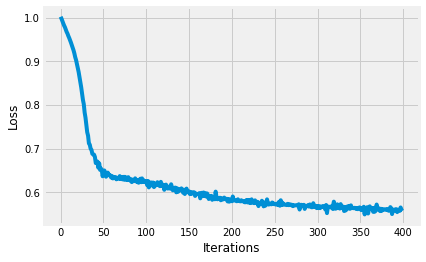

In [11]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
  
# Plotting the last 100 values
plt.plot(losses)

torch.Size([525, 107])
(525, 3)


Text(0.5, 0, 'z')

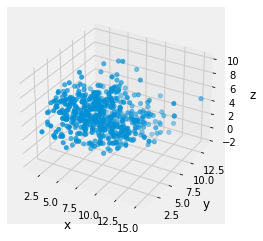

In [12]:
# Plot Latent trajectories
print(train_array[0].shape)
pred_logrates, latents = model(train_array[0])
latents = latents.detach().numpy()
print(latents.shape)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d")
ax1.scatter(*latents.T)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')


torch.Size([75, 7, 107])


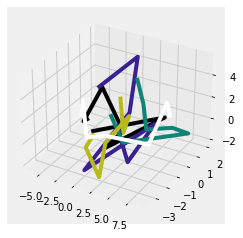

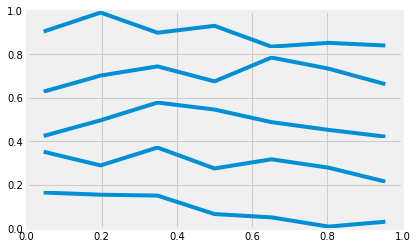

In [13]:
num_trials = 5
cmap = cmr.rainforest
colors = cmap(np.linspace(0, 1, num_trials))
latents = []
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection="3d")

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
print(train_tensor[0].shape)
ac1 = np.zeros(num_trials)
_, latents_all = model(train_tensor[0])
latents_all = latents_all.detach().numpy()
n_trials, n_steps, n_latents = latents_all.shape
latents_flat = latents_all.reshape(-1, n_latents)
pca = PCA(n_components=3)
latents = pca.fit_transform(latents_flat)
latents = latents.reshape(n_trials, n_steps, 3)
explained_variance = np.sum(pca.explained_variance_ratio_)

t = np.linspace(0, n_steps, n_steps)

for i in range(num_trials):
  ax2.plot(latents[i,:, 0], latents[i,:,1], latents[i,:,2], color = colors[i,:])
  ax3 = fig3.add_subplot(num_trials, 1, i+1)
  ax3.plot(t, latents[i,:,0])
  ax3.axis("off")


# Part 2: Sequential Auto-Encoders

## Why Neural Dynamics are important:







In [ ]:
# Three neuron illustration of neural dynamics

## Evaluation Metrics

### Practical

### Scientific


In [ ]:
# Explanation of metrics

# Practical
  # Vel R2
# Scientific
  # co_bps
  # fp_bps

## Types of RNNs

In [14]:
class AbstractRNN(nn.Module):
  def __init__(self, cell):
    super().__init__()
    self.cell = cell
  def forward(self, input, h_0):
    hidden = h_0
    states = []
    for input_step in input.transpose(0,1):
      hidden = self.cell(input_step, hidden)
      states.append(hidden)
    states = torch.stack(states, dim=1)
    return states, hidden

### Linear RNNs

In [15]:
class LinearRNN(nn.Module):
  def __init__(self, input_size, hidden_size):
    super().__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size

    self.in2hidden = nn.Linear(input_size + hidden_size, hidden_size)

  def forward(self, input, hidden):
    combined = torch.cat((input, hidden),1)
    hidden =self.in2hidden(combined)
    return hidden

### Nonlinear RNNs

In [16]:
class NonLinearRNN(nn.Module):
  def __init__(self, input_size, hidden_size):
    super().__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size

    self.in2hidden = nn.Linear(input_size + hidden_size, hidden_size)

  def forward(self, input, hidden):
    combined = torch.cat((input, hidden),1)
    hidden =  torch.tanh(self.in2hidden(combined))
    return hidden

### Gated Recurrent Units

In [17]:
class GRUTemp(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(GRUTemp, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size

    self.in2hidden = nn.Linear(input_size, 3*hidden_size)
    self.hidden2hidden = nn.Linear(hidden_size, 3*hidden_size)
    self.reset_parameters()

  def reset_parameters(self):
    std = 1.0 / np.sqrt(self.hidden_size)
    for w in self.parameters():
      w.data.uniform_(-std, std)

  def forward(self, input, hidden):
    if hidden is None:
        hidden = Variable(input.new_zeros(input.size(0), self.hidden_size))
    combined = torch.cat((input, hidden),1)
    hidden =  torch.tanh(self.in2hidden(combined))
    x_t = self.in2hidden(input)
    h_t = self.hidden2hidden(hidden)

    x_reset, x_upd, x_new = x_t.chunk(3,1)
    h_reset, h_upd, h_new = h_t.chunk(3,1)

    reset = torch.sigmoid(x_reset + h_reset)
    update = torch.sigmoid(x_upd + h_upd)
    new_gate = torch.tanh(x_new + (reset * h_new))

    h_out = update * hidden + (1 - update) * new_gate
    return h_out

## Sequential Auto-Encoder Model

In [18]:
# Vanilla SAE code
class VanillaSAE(torch.nn.Module):
    def __init__(self, input_size, latent_size, encoder_size, out_size):
        super().__init__()
        self.encoder = nn.GRU(
            input_size=input_size,
            hidden_size=encoder_size,
            batch_first=True,
            bidirectional=True,
        )

        self.ic_linear = nn.Linear(2 * encoder_size, latent_size)
  
        self.decoder = AbstractRNN(GRUTemp(input_size=1, hidden_size=latent_size))
        self.readout = nn.Linear(latent_size, out_size)
  
    def forward(self, x):
        # Implement forward pass of AE network
        _, h_n = self.encoder(x)
        print(h_n.shape)
        h_n = torch.cat([*h_n], -1)
        B, T, _ = x.shape
        print(h_n.shape)
        input_placeholder = torch.zeros((B, T, 1))
        ic = self.ic_linear( h_n)
        print(ic.shape)
        latents = self.decoder(input_placeholder, ic)
        log_rates = self.readout(latents)
        return log_rates, latents

sae = VanillaSAE(107, 3, 64, 142)
# Build your training loop
epochs = 200
outputs = []
losses = []
for epoch in range(epochs):
  if np.mod(epoch, 10)==0:
    print("Epoch: {}".format(epoch))
  for (data_batch, data_recon) in train_dataloader_tensor:

    #------------------For Students------------------------
    # Output of Autoencoder
    print(data_batch.shape)
    reconstructed, latents = sae(data_batch)
      
    # Calculating the loss function
    loss = loss_function(reconstructed, data_recon)
      

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #-----------------------------------------------------

    # Storing the losses in a list for plotting
    losses.append(loss.detach().numpy())
  outputs.append((epochs, data_batch, reconstructed))

Epoch: 0
torch.Size([75, 7, 107])
torch.Size([2, 75, 64])
torch.Size([75, 128])
torch.Size([75, 3])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (75x4 and 1x9)

## SAE Latent Trajectories

In [ ]:
# Plot the SAE trajectories
  # Forward predictions

## SAE vs. AE: How much does a dynamics model get us?

In [ ]:
# Compare metrics for AE and SAE



# Part 3: Variational Auto-Encoding

## Overfitting problem

In [ ]:
# Illustrate overfitting problems

## Variational auto-encoders

In [ ]:
# Illustrate how variational models help

## What we need to add

### Probability distribution over initial conditions

In [ ]:
# Probabilistic sampling

### Prior on IC distribution

In [ ]:
# KL divergence

## Code the v-SAE Class

In [ ]:
# Modify SAE to be variational
class VariationalSAE(torch.nn.Module):
    def __init__(self):
        super().__init__()
          
        
        self.encoder = "Make an encoder network to find initial conditions"
       
        self.decoder = "Make a decoder network to model latent dynamics"

        self.readout = "Simple linear readouts"
  
    def forward(self, x):
        # Implement forward pass of v-SAE network
        return decoded

## Train the v-SAE

## Compare v-SAE to SAE and AE

### Visualize ICs

### Compare metrics

# Part 4: Non-autonomous dynamics

## Why do we care about inputs?

In [ ]:
# Sensory perturbations illustration

### Autonomous vs. non-autonomous dynamics

### Can we modify SAE to also recover inputs?

## Controller module

In [ ]:
# Illustrate what the controller does

## Add Controller to v-SAE

In [ ]:
# Vanilla SAE code
class LFADSLite(torch.nn.Module):
    def __init__(self):
        super().__init__()
          

        self.encoder = "Make an encoder network to find initial conditions"
        # self.encoder = torch.nn.Sequential(
        #     torch.nn.Linear(28 * 28, 128),
        #     torch.nn.ReLU(),
        #     torch.nn.Linear(128, 64),
        #     torch.nn.ReLU(),
        #     torch.nn.Linear(64, 36),
        #     torch.nn.ReLU(),
        #     torch.nn.Linear(36, 18),
        #     torch.nn.ReLU(),
        #     torch.nn.Linear(18, 9)
        # )
          
        self.decoder = "Make a decoder network to model latent dynamics"
        # self.decoder = torch.nn.Sequential(
        #     torch.nn.Linear(9, 18),
        #     torch.nn.ReLU(),
        #     torch.nn.Linear(18, 36),
        #     torch.nn.ReLU(),
        #     torch.nn.Linear(36, 64),
        #     torch.nn.ReLU(),
        #     torch.nn.Linear(64, 128),
        #     torch.nn.ReLU(),
        #     torch.nn.Linear(128, 28 * 28),
        #     torch.nn.Sigmoid()
        # )

        self.readout = "Simple linear readouts"
  
    def forward(self, x):
        # Implement forward pass of AE network

        # encoded = self.encoder(x)
        # decoded = self.decoder(encoded)
        return decoded

## Train LFADS-lite

## LFADS-lite visualizations

### Latent trajectories

### Inferred inputs


## Compare to SAE/AE


# Part 5: Future Directions

## Interpretability

## Neural Manifolds